In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importações 
import cv2 as cv # OpenCV
import matplotlib.pyplot as plt  # Biblioteca para imprimir as imagens
import numpy as np # Utilizado para realizar a cópia de uma imagem
import pandas as pd # Biblioteca para trabalhar com dataframes

In [ ]:
from google.colab import files
imports = files.upload()
print(*imports, sep="\n")

Saving teste3.jpg to teste3.jpg
teste3.jpg


<class 'numpy.ndarray'>


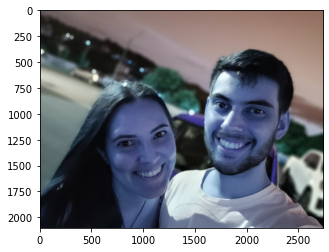

In [ ]:
# Fazendo a leitura da imagem
image = cv.imread(*imports) 
print(type(image))
plt.imshow(image) # Faz a impressão da imagem na forma "ivertida" (BGR)

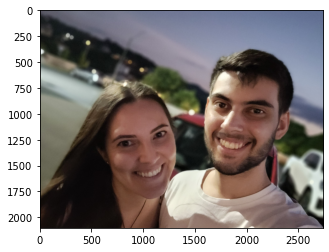

In [ ]:
# Realizando a conversão de BGR para RGB e exibindo imagem
def show_pic(pic):
  rgb_image = cv.cvtColor(pic,cv.COLOR_BGR2RGB)
  plt.imshow(rgb_image)

show_pic(image)

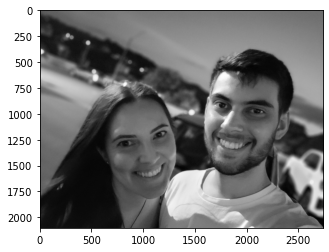

In [ ]:
# Convertendo a imagem para tons de cinza
image_to_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
show_pic(image_to_gray)

In [ ]:
features_haar = "haarcascade_frontalface_alt2.xml" # Detecção de faces frontais, arquivo fornecido pelo openCV
path = f"{cv.haarcascades}{features_haar}" # Caminho até o arquivo do feature haar do openCV
print(path)

/usr/local/lib/python3.7/dist-packages/cv2/data/haarcascade_frontalface_alt2.xml


In [ ]:
classifier = cv.CascadeClassifier(path) # Utilizando o modelo CascadeClassifier passando as features como parâmetro
faces = classifier.detectMultiScale(image_to_gray)

Type: <class 'numpy.ndarray'>


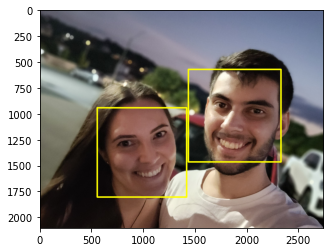

In [ ]:
print("Type:",type(image))
image_copy = np.array(image) # Faz uma cópia do array, as imagens retornadas pelo cv.imread é do tipo numpy array

# Destacando um quadrado de cor amarela onde foram detectados rostos
for x,y,w,h in faces: 
  cv.rectangle(image_copy, (x,y), (x+w, y+h), (0,255,255), 14)

show_pic(image_copy) # Chamada da função para exibir a imagem

In [ ]:
cropped_images = [] # Lista que ira armazenar as faces redimensionadas

 # Percorre o array que contém todas as faces
for x,y,w,h in faces:
  face = image[y:y+h, x:x+w] 
  face = cv.resize(face, (180,180)) # Redimensiona
  cropped_images.append(face) # Adiciona na lista de imagens cropadas

len(cropped_images) # Retorna uma lista com os rostos em maior destaque

2

In [ ]:
# for img in cropped_images: 
#   print(img.shape)

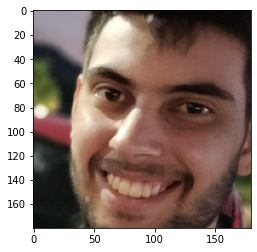

In [ ]:
show_pic(cropped_images[0])


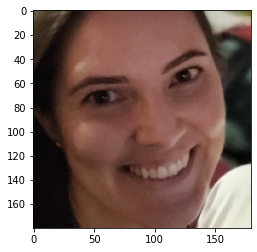

In [ ]:
show_pic(cropped_images[1])

In [ ]:
# import os

# # Salvando as imagens na pasta img do meu drive
# def save_images(images,path):
#   print(path)
#   if not os.path.exists(path):
#     os.mkdir(path)
  
#   idx = len(os.listdir(path))

#   for image in images:
#     idx += 1
#     cv.imwrite(f"{path}/{idx}.jpg",image)

# save_images(cropped_images,'/content/drive/MyDrive/inteligencia-artificial/trabalho-final/img') 

In [ ]:
# import cv2 as cv
# import numpy as np
# import pandas as pd
import os 
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os 

def load_df():
  data = {
      "FILE":[],
      # "LABEL":[],
      "WEARING_MASK":[]
  }

  with_mask_images_path = '/content/drive/MyDrive/inteligencia-artificial/trabalho-final/images/with-mask'
  no_mask_images_path = '/content/drive/MyDrive/inteligencia-artificial/trabalho-final/images/no-mask'

  wearing_mask = os.listdir(with_mask_images_path)
  not_wearing_mask = os.listdir(no_mask_images_path)

  # Contando quantas imagens com mascara
  images_mask = 0
  dir = no_mask_images_path
  for path in os.listdir(dir):
      if os.path.isfile(os.path.join(dir, path)):
          images_mask += 1
  print(f"O diretorio {with_mask_images_path} possui {images_mask} imagens")

  # Contando quantas imagens sem máscara
  images_no_mask = 0
  dir = with_mask_images_path
  for path in os.listdir(dir):
      if os.path.isfile(os.path.join(dir, path)):
          images_no_mask += 1
  print(f"O diretorio {no_mask_images_path} possui {images_no_mask} imagens")

  # Percorre os arquivos na pasta with-mask
  for fl in wearing_mask:
    aux = f"{with_mask_images_path}{os.sep}{fl}"
    print(aux)
    if ".gif" in aux: # Tratamento para remoção de arquivos .gif
      os.remove(aux)
    data["FILE"].append(aux) # Armazena o caminho do arquivo na coluna file
    # data["LABEL"].append(f"Mask") # Coloca a label como mask
    data["WEARING_MASK"].append(1) # Se está usando máscara o wearing_mask (classificador) é = 1

  for fl in not_wearing_mask:
    aux2 = f"{no_mask_images_path}{os.sep}{fl}"
    print(aux2)
    if ".gif" in aux2:
      os.remove(aux2)
    data["FILE"].append(aux2)
    # data["LABEL"].append(f"No Mask")
    data["WEARING_MASK"].append(0)

  dataframe = pd.DataFrame(data) 



  return dataframe
    

In [ ]:
data = load_df()

data.to_csv("/content/drive/MyDrive/inteligencia-artificial/trabalho-final/csv/labels.csv")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/inteligencia-artificial/trabalho-final/csv/labels.csv")

In [ ]:
# Função para ler imagens
def read_images(data):
  files = data["FILE"] # Coluna onde se encontra o caminho do arquivo 
  images = []

  for fl in files:
    img = cv.cvtColor(cv.imread(fl), cv.COLOR_BGR2GRAY).flatten() # Transformando para escala de cinza -> vetor
    images.append(img)

  data["IMAGE"] = images # Armazena as imagens convertidas para array em uma nova coluna

In [ ]:
read_images(data)
data.head()

,Unnamed: 0,FILE,WEARING_MASK,IMAGE
0,0,/content/drive/MyDrive/inteligencia-artificial...,1,"[18, 17, 15, 13, 13, 13, 14, 15, 17, 19, 22, 2..."
1,1,/content/drive/MyDrive/inteligencia-artificial...,1,"[44, 49, 52, 49, 45, 45, 51, 58, 63, 60, 56, 5..."
2,2,/content/drive/MyDrive/inteligencia-artificial...,1,"[117, 115, 110, 107, 114, 126, 137, 142, 133, ..."
3,3,/content/drive/MyDrive/inteligencia-artificial...,1,"[36, 38, 42, 45, 47, 46, 45, 44, 42, 42, 40, 3..."
4,4,/content/drive/MyDrive/inteligencia-artificial...,1,"[50, 57, 46, 56, 60, 54, 65, 56, 57, 45, 33, 2..."


In [ ]:
# Convertendo para lista
X = list(data["IMAGE"])
y = list(data["WEARING_MASK"])


# Como o dataset está desbalanceado, estou aplicando a técnicade SMOTE para balancea-lo
smt = SMOTE()
X,y = smt.fit_resample(X,y)



print("Classes",y)

Classes [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
# Separando entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)

In [ ]:
pca = PCA(n_components=30) 
pca.fit(X_train)

PCA(n_components=30)

In [ ]:
X_train = pca.transform(X_train) 
X_test = pca.transform(X_test)

In [ ]:
parameters = {
    "n_neighbors": [2,3,5,11,19,23,29], # De acordo com um artigo lido, são melhores numeros ímpares ou primos
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattam", "cosine", "l1", "l2"] # Distâncias
}

In [ ]:
knn = GridSearchCV(KNeighborsClassifier(), parameters) # Instância do GridSearch e modelo vazio knn e os parâmetros
knn.fit(X_train, y_train) # Reliza o treinamento do knn
knn.score(X=X_test, y=y_test) # Precisão média nos dados de teste e labels

0.8862068965517241

In [ ]:
# KNN
prediction = knn.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel() # Matriz de confusão

print("True negative:",tn)
print("True positive:",tp)

print('-------------------')
print("False positive:",fp)
print("False negative:",fn)

acc = (tp + tn) / (tp + tn + fp + fn) # Cálculo da ácuracia
print('Accuracy: %.2f' % (acc*100),'%')

True negative: 129
True positive: 128
-------------------
False positive: 14
False negative: 19
Accuracy: 88.62 %


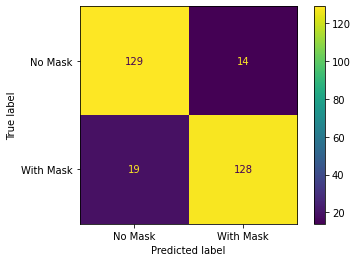

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
conf_mat = confusion_matrix(y_test, prediction)
show_conf_mat = ConfusionMatrixDisplay(conf_mat, display_labels=['No Mask','With Mask'])
show_conf_mat.plot()

In [ ]:
# Dicionário para classificar as imagens
path = f"{cv.haarcascades}/haarcascade_frontalface_alt2.xml"
classifier = cv.CascadeClassifier(path) # Reconhecimento de faces (frontais)
classes = {
    0: "No mask",
    1: "Mask"
}

In [ ]:
def proccess_image(pca, classifier, image):
  img = cv.imread(image)
  image_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  faces = classifier.detectMultiScale(img) 
  vectors = [] 
  count = 0
  fig = plt.figure(figsize=(12,12))
  
  for x,y,w,h in faces:
    cutted_face = image_grey[y:y+h, x:x+w]
    fig.add_subplot(3, 3, count+1)
    plt.imshow(cv.cvtColor(cutted_face, cv.COLOR_BGR2RGB))
    count+=1 
    cutted_face = cv.resize(cutted_face, (160,160))
    vector = cutted_face.flatten() 
    vectors.append(vector)

  plt.show()
  return vectors

Saving fam.jpg to fam.jpg


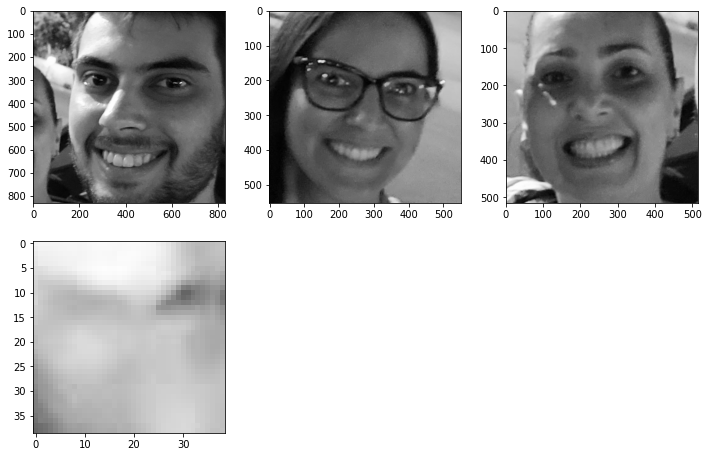

No mask
No mask
No mask
No mask


In [ ]:
#Knn
image = files.upload()
vectors = proccess_image(pca,classifier,*image)
c = knn.predict(pca.transform(vectors)) # Armazena o resultado obtido pelo knn
for x in c:
  print(classes[x])# Verifica o valor retornado pelo e classifica de acordo com a classe

Saving test.jpg to test.jpg


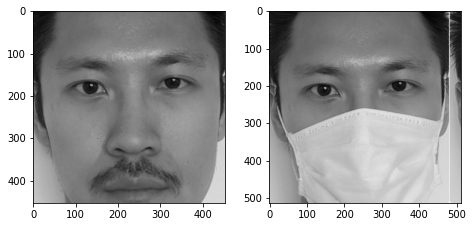

No mask
Mask


In [ ]:
#Knn
image = files.upload()
vectors = proccess_image(pca,classifier,*image)
c = knn.predict(pca.transform(vectors)) # Armazena o resultado trazido pelo knn
for x in c:
  print(classes[x])